In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [5]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 162M/163M [00:08<00:00, 23.9MB/s]
100% 163M/163M [00:08<00:00, 20.4MB/s]


In [6]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image 
from sklearn.model_selection import train_test_split

In [10]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2069.jpg', 'without_mask_2921.jpg', 'without_mask_1581.jpg', 'without_mask_2292.jpg', 'without_mask_2127.jpg']
['without_mask_3189.jpg', 'without_mask_937.jpg', 'without_mask_253.jpg', 'without_mask_2313.jpg', 'without_mask_1500.jpg']


In [12]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2069.jpg', 'without_mask_2921.jpg', 'without_mask_1581.jpg', 'without_mask_2292.jpg', 'without_mask_2127.jpg']
['without_mask_3189.jpg', 'without_mask_937.jpg', 'without_mask_253.jpg', 'without_mask_2313.jpg', 'without_mask_1500.jpg']


In [13]:
print("Number of mask images:", len(with_mask_files))
print("Number of without mask images:", len(without_mask_files))

Number of mask images: 3725
Number of without mask images: 3828


**Creating labels for the two class of images**

with Mask --> 1

without Mask --> 0

In [14]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [15]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [16]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [17]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the images**

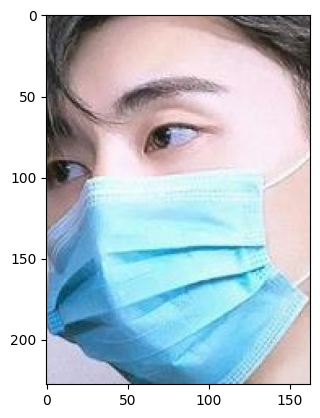

In [18]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

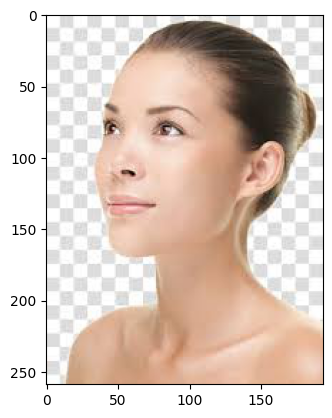

In [19]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**



1. Resize the images

2. Converting the images into Numpy arrays

In [20]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [21]:
type(data)

list

In [22]:
len(data)

7553

In [23]:
data[0]

array([[[247, 234, 200],
        [248, 235, 201],
        [248, 235, 201],
        ...,
        [243, 227, 201],
        [243, 227, 201],
        [243, 227, 201]],

       [[247, 234, 200],
        [248, 235, 201],
        [248, 235, 201],
        ...,
        [243, 227, 201],
        [243, 227, 201],
        [243, 227, 201]],

       [[247, 234, 200],
        [248, 235, 201],
        [248, 235, 201],
        ...,
        [243, 227, 201],
        [243, 227, 201],
        [243, 227, 201]],

       ...,

       [[221, 214, 188],
        [221, 214, 188],
        [220, 213, 187],
        ...,
        [224, 219, 216],
        [223, 218, 214],
        [223, 218, 212]],

       [[221, 214, 188],
        [221, 214, 188],
        [220, 213, 187],
        ...,
        [224, 219, 216],
        [223, 218, 214],
        [223, 218, 212]],

       [[221, 214, 188],
        [221, 214, 188],
        [220, 213, 187],
        ...,
        [224, 219, 216],
        [223, 218, 214],
        [223, 218, 212]]

In [24]:
type(data[0])

numpy.ndarray

In [25]:
data[0].shape

(128, 128, 3)

In [26]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [27]:
type(X)

numpy.ndarray

In [28]:
type(Y)

numpy.ndarray

In [29]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [30]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [33]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [34]:
X_train[0]

array([[[ 38,  23,  16],
        [ 38,  23,  16],
        [ 38,  23,  17],
        ...,
        [ 27,  18,  20],
        [ 27,  18,  19],
        [ 27,  18,  19]],

       [[ 38,  23,  17],
        [ 38,  23,  17],
        [ 38,  24,  18],
        ...,
        [ 27,  18,  20],
        [ 27,  18,  19],
        [ 27,  18,  19]],

       [[ 37,  25,  18],
        [ 37,  25,  19],
        [ 37,  25,  20],
        ...,
        [ 28,  20,  21],
        [ 28,  20,  19],
        [ 28,  20,  19]],

       ...,

       [[ 98,  61,  12],
        [107,  69,  19],
        [125,  88,  37],
        ...,
        [ 42,  23,  15],
        [ 45,  25,  17],
        [ 47,  26,  17]],

       [[112,  71,  23],
        [119,  78,  30],
        [137,  97,  47],
        ...,
        [ 43,  24,  16],
        [ 46,  26,  18],
        [ 48,  27,  18]],

       [[118,  76,  28],
        [125,  82,  35],
        [143, 101,  52],
        ...,
        [ 43,  24,  16],
        [ 46,  26,  18],
        [ 48,  27,  18]]

In [35]:
X_train_scaled[0]

array([[[0.14901961, 0.09019608, 0.0627451 ],
        [0.14901961, 0.09019608, 0.0627451 ],
        [0.14901961, 0.09019608, 0.06666667],
        ...,
        [0.10588235, 0.07058824, 0.07843137],
        [0.10588235, 0.07058824, 0.0745098 ],
        [0.10588235, 0.07058824, 0.0745098 ]],

       [[0.14901961, 0.09019608, 0.06666667],
        [0.14901961, 0.09019608, 0.06666667],
        [0.14901961, 0.09411765, 0.07058824],
        ...,
        [0.10588235, 0.07058824, 0.07843137],
        [0.10588235, 0.07058824, 0.0745098 ],
        [0.10588235, 0.07058824, 0.0745098 ]],

       [[0.14509804, 0.09803922, 0.07058824],
        [0.14509804, 0.09803922, 0.0745098 ],
        [0.14509804, 0.09803922, 0.07843137],
        ...,
        [0.10980392, 0.07843137, 0.08235294],
        [0.10980392, 0.07843137, 0.0745098 ],
        [0.10980392, 0.07843137, 0.0745098 ]],

       ...,

       [[0.38431373, 0.23921569, 0.04705882],
        [0.41960784, 0.27058824, 0.0745098 ],
        [0.49019608, 0

**Building a Convolutional Neural Network (CNN)**

In [36]:
import tensorflow as tf
from tensorflow import keras

In [37]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [38]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [39]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 14s 20ms/step - loss: 0.5569 - acc: 0.7486 - val_loss: 0.2822 - val_acc: 0.8876
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.3045 - acc: 0.8773 - val_loss: 0.2612 - val_acc: 0.9008
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2652 - acc: 0.8972 - val_loss: 0.2499 - val_acc: 0.8992
Epoch 4/5
170/170 [==============================] - 3s 16ms/step - loss: 0.2378 - acc: 0.9086 - val_loss: 0.2301 - val_acc: 0.9058
Epoch 5/5
170/170 [==============================] - 3s 16ms/step - loss: 0.1931 - acc: 0.9228 - val_loss: 0.3074 - val_acc: 0.9025


**Model Evaluation**

In [40]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 12ms/step - loss: 0.3364 - acc: 0.8868
Test Accuracy = 0.8868299126625061


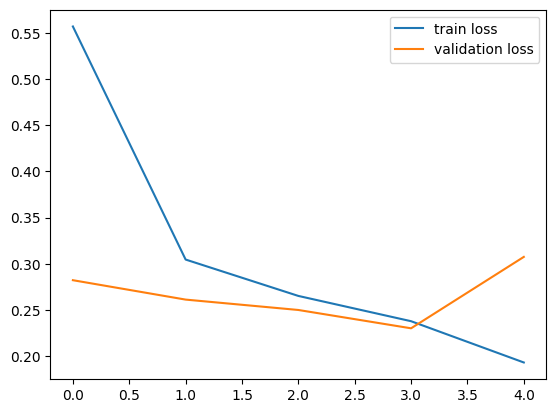

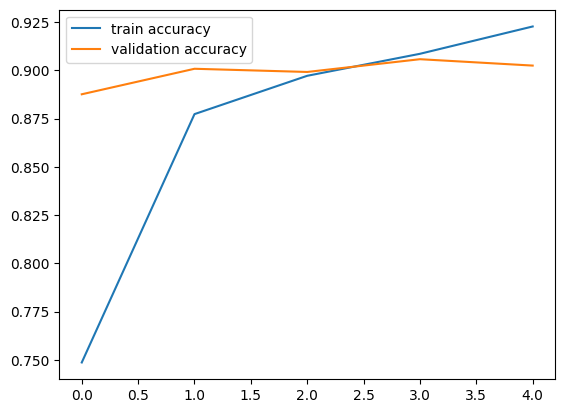

In [41]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/ImageWithMask.png


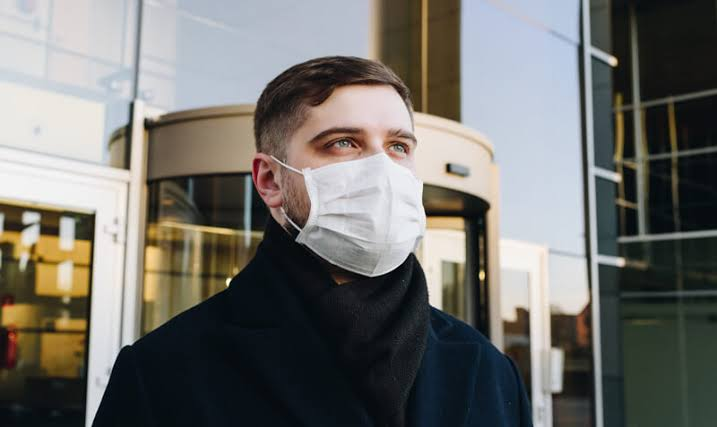

1/1 [==============================] - 0s 170ms/step
[[0.41113502 0.550834  ]]
1
The person in the image is wearing a mask


In [42]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/imageWithoutMask.png


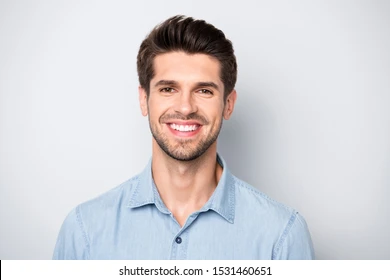

1/1 [==============================] - 0s 19ms/step
[[0.5974645  0.42752746]]
0
The person in the image is not wearing a mask


In [43]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')